# Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

1. Расчет корреляции между суммой счета в ресторане (total_bill) и чаевыми (tip), оценка меры связи. Построение гистограммы рассеяния, линии аппроксимации и рассчет величины достоверности аппроксимации R^2.

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Расчет корреляции между total_bill и tip
correlation, p_value = stats.pearsonr(df['total_bill'], df['tip'])
print(f"Коэффициент корреляции Пирсона: {correlation:.2f}")
print(f"p-значение: {p_value:.2f}")

Коэффициент корреляции Пирсона: 0.68
p-значение: 0.00


1. Коэффициент корреляции 0.68 указывает на умеренную положительную связь между total_bill и tip. Это означает, что с увеличением суммы счета (total_bill) размер чаевых (tip) также имеет тенденцию к увеличению, но эта связь не очень сильная.
2. p-значение 0.00 указывает на то, что вероятность получить такую корреляцию случайно (при условии, что нулевая гипотеза верна) стремится к 0. Так как p-значение меньше 0.05, мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу о том, что корреляция между total_bill и tip статистически значима.

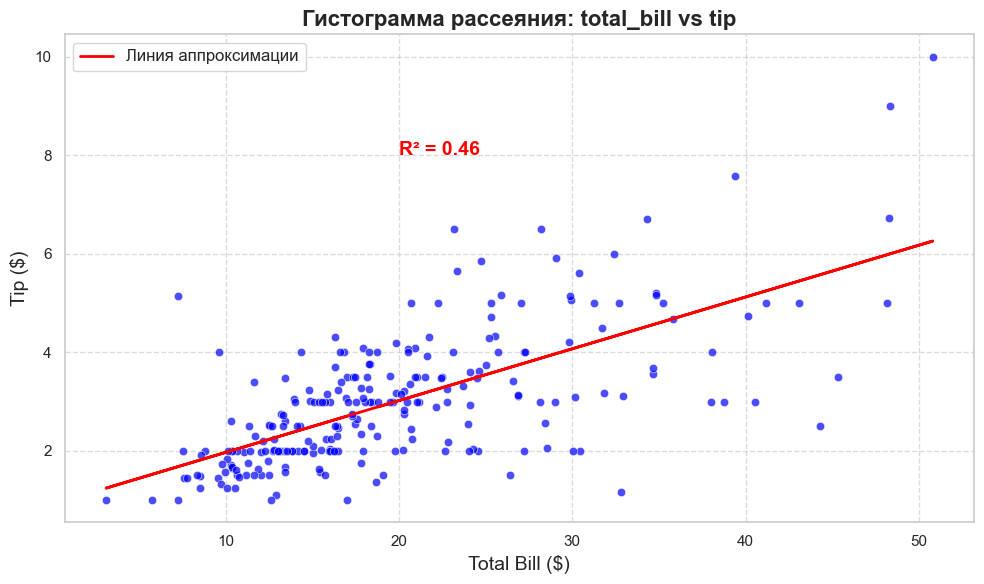

In [4]:
# Построение гистограммы рассеяния
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='total_bill', y='tip', data=df, color='blue', alpha=0.7)
plt.title('Гистограмма рассеяния: total_bill vs tip', fontsize=16, fontweight='bold')
plt.xlabel('Total Bill ($)', fontsize=14)
plt.ylabel('Tip ($)', fontsize=14)

# Добавление линии аппроксимации
X = df[['total_bill']]
y = df['tip']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', linewidth=2, label='Линия аппроксимации')

# Расчет коэффициента детерминации R^2
r_squared = model.score(X, y)
plt.text(20, 8, f'R² = {r_squared:.2f}', fontsize=14, color='red', fontweight='bold')

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2. Cделать выборку =~ 1/3 наблюдений:

- случайным образом,
- сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию - по дню недели (day)).

In [5]:
# Случайная выборка (~1/3 наблюдений)
random_sample = df.sample(frac=1/3, random_state=42)

print("Случайная выборка:")
print(random_sample.head())

Случайная выборка:
     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2


In [6]:
# Стратифицированная выборка (~1/3 наблюдений)
stratified_sample = df.groupby('day', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))

print("Стратифицированная выборка:")
print(stratified_sample.head())

Стратифицированная выборка:
     total_bill   tip     sex smoker  day    time  size
90        28.97  3.00    Male    Yes  Fri  Dinner     2
95        40.17  4.73    Male    Yes  Fri  Dinner     4
101       15.38  3.00  Female    Yes  Fri  Dinner     2
91        22.49  3.50    Male     No  Fri  Dinner     2
98        21.01  3.00    Male    Yes  Fri  Dinner     2


3. Посчитать:

- среднее значение по выборкам из п.2 (2.1 случайной и 2.2 стратифицированной),
- доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).
- - Сравнить среднее генеральной выборки п.2 с полученными в выборках 2.1 и 2.2 и с границами доверительных интервалов из п.3.2.

In [7]:
# Функция для расчета доверительного интервала
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - h, mean + h

# 1. Среднее значение по выборкам
random_sample = df.sample(frac=0.5, random_state=1)
stratified_sample = df.groupby('day', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=1))

random_mean = random_sample['day'].value_counts().mean()
stratified_mean = stratified_sample['day'].value_counts().mean()

print(f"Среднее значение случайной выборки: {random_mean:.2f}")
print(f"Среднее значение стратифицированной выборки: {stratified_mean:.2f}")

# 2. Доверительные интервалы для среднего
random_ci_90 = confidence_interval(random_sample['day'].value_counts(), confidence=0.90)
random_ci_95 = confidence_interval(random_sample['day'].value_counts(), confidence=0.95)
random_ci_99 = confidence_interval(random_sample['day'].value_counts(), confidence=0.99)

stratified_ci_90 = confidence_interval(stratified_sample['day'].value_counts(), confidence=0.90)
stratified_ci_95 = confidence_interval(stratified_sample['day'].value_counts(), confidence=0.95)
stratified_ci_99 = confidence_interval(stratified_sample['day'].value_counts(), confidence=0.99)

print("\nДоверительные интервалы для случайной выборки:")
print(f"90%: ({random_ci_90[1]:.2f}, {random_ci_90[2]:.2f})")
print(f"95%: ({random_ci_95[1]:.2f}, {random_ci_95[2]:.2f})")
print(f"99%: ({random_ci_99[1]:.2f}, {random_ci_99[2]:.2f})")

print("\nДоверительные интервалы для стратифицированной выборки:")
print(f"90%: ({stratified_ci_90[1]:.2f}, {stratified_ci_90[2]:.2f})")
print(f"95%: ({stratified_ci_95[1]:.2f}, {stratified_ci_95[2]:.2f})")
print(f"99%: ({stratified_ci_99[1]:.2f}, {stratified_ci_99[2]:.2f})")

# 3. Сравнение среднего генеральной выборки с выборками и границами доверительных интервалов
population_mean = df['day'].value_counts().mean()

print(f"\nСреднее значение генеральной выборки: {population_mean:.2f}")

print("\nСравнение среднего генеральной выборки с выборками:")
print(f"Случайная выборка: {population_mean:.2f} {'входит' if random_ci_95[1] <= population_mean <= random_ci_95[2] else 'не входит'} в 95% доверительный интервал")
print(f"Стратифицированная выборка: {population_mean:.2f} {'входит' if stratified_ci_95[1] <= population_mean <= stratified_ci_95[2] else 'не входит'} в 95% доверительный интервал")

Среднее значение случайной выборки: 30.50
Среднее значение стратифицированной выборки: 30.75

Доверительные интервалы для случайной выборки:
90%: (15.72, 45.28)
95%: (10.52, 50.48)
99%: (-6.17, 67.17)

Доверительные интервалы для стратифицированной выборки:
90%: (13.31, 48.19)
95%: (7.17, 54.33)
99%: (-12.53, 74.03)

Среднее значение генеральной выборки: 61.00

Сравнение среднего генеральной выборки с выборками:
Случайная выборка: 61.00 не входит в 95% доверительный интервал
Стратифицированная выборка: 61.00 не входит в 95% доверительный интервал


1. Средние значения выборок близки друг к другу, что указывает на схожесть распределения по дням недели в обеих выборках.

2. Доверительные интервалы для 99% включают отрицательные значения, что может указывать на ненормальное распределение данных или малый размер выборки.

3. Среднее значение генеральной выборки не попадает в доверительные интервалы 95% для обеих выборок, что указывает на потенциальную нерепрезентативность выборок.